In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

GRAPH_SIZE = 10
num_edges = 24

In [41]:
GRAPH_SIZE = 10
num_edges = 24

adj_matrix = np.array([
    [0, 3, 3, 4, 3, 0, 0, 1, 0, 4],
    [3, 0, 0, 2, 0, 2, 0, 3, 0, 0],
    [3, 0, 0, 1, 0, 0, 1, 0, 4, 0],
    [4, 2, 1, 0, 3, 0, 0, 0, 3, 1],
    [3, 0, 0, 3, 0, 4, 4, 0, 1, 0],
    [0, 2, 0, 0, 4, 0, 2, 0, 3, 2],
    [0, 0, 1, 0, 4, 2, 0, 0, 3, 0],
    [1, 3, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 4, 3, 1, 3, 3, 1, 0, 0],
    [4, 0, 0, 1, 0, 2, 0, 1, 0, 0]
])

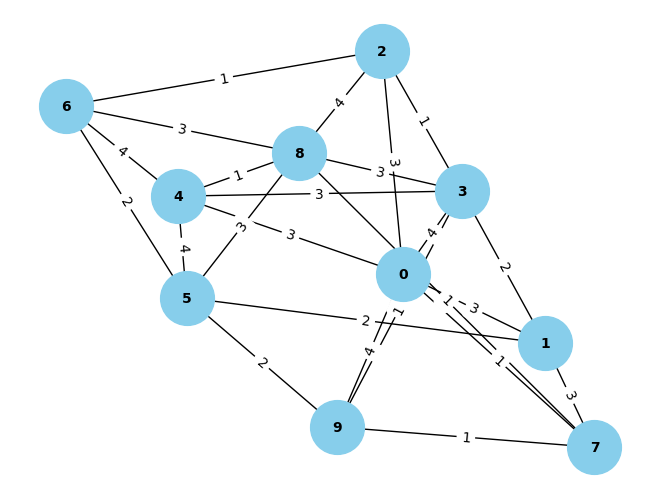

In [42]:
# Create an empty graph
G = nx.Graph()

# Add edges to the graph based on the adjacency matrix
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix[i])):
        if adj_matrix[i][j] != 0:
            G.add_edge(i, j, weight=adj_matrix[i][j])  # Add edge weight as an attribute

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.show()

In [49]:
# Prim's Algorithm
INF = 9999999
N = GRAPH_SIZE
G = adj_matrix

selected_node = [False] * N

no_edge = 0

selected_node[0] = True

edges = []


# Printing for edge and weight
prims_cost = 0
print("Edge : Weight\n")
while no_edge < N - 1:
    minimum = INF
    a = 0
    b = 0
    for m in range(N):
        if selected_node[m]:
            for n in range(N):
                if not selected_node[n] and G[m][n]:
                    if minimum > G[m][n]:
                        minimum = G[m][n]
                        a = m
                        b = n
    print(str(a) + "-" + str(b) + ":" + str(G[a][b]))
    prims_cost += G[a][b]
    edges.append((a, b))
    selected_node[b] = True
    no_edge += 1

print("Prim's Algorithm Cost: ", prims_cost)

Edge : Weight

0-7:1
7-8:1
7-9:1
8-4:1
9-3:1
3-2:1
2-6:1
3-1:2
1-5:2
Prim's Algorithm Cost:  11


Edges found by Prim's Algorithm:
Edge: (0, 7), Weight: 1
Edge: (7, 8), Weight: 1
Edge: (7, 9), Weight: 1
Edge: (8, 4), Weight: 1
Edge: (9, 3), Weight: 1
Edge: (3, 2), Weight: 1
Edge: (2, 6), Weight: 1
Edge: (3, 1), Weight: 2
Edge: (1, 5), Weight: 2


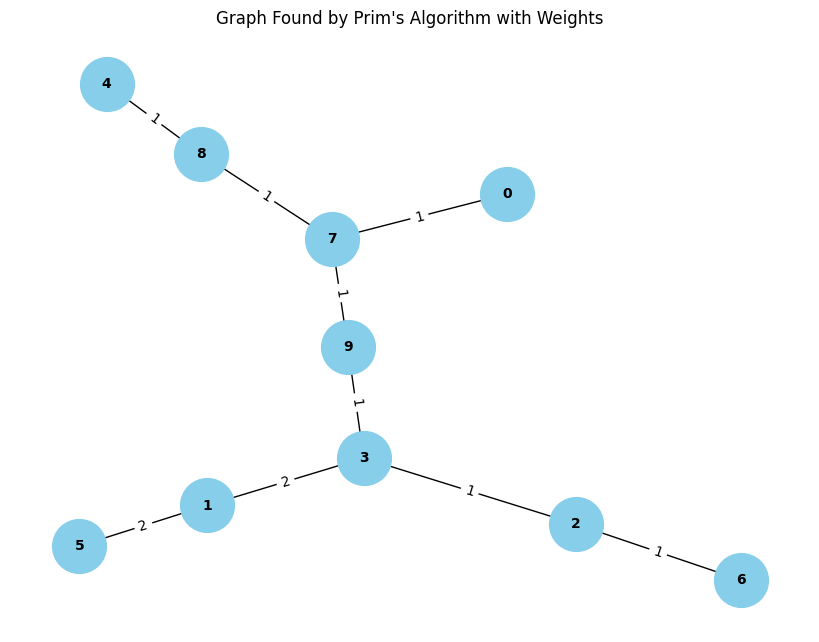

In [44]:
# Print the found edges and their weights
print("Edges found by Prim's Algorithm:")
for edge in edges:
    weight = G[edge[0]][edge[1]]  # Get the weight from the adjacency matrix
    print(f"Edge: {edge}, Weight: {weight}")

# Create a graph using NetworkX with weights included
G_prim = nx.Graph()
for edge in edges:
    weight = G[edge[0]][edge[1]]  # Get the weight from the adjacency matrix
    G_prim.add_edge(edge[0], edge[1], weight=weight)

# Draw the graph with edge labels
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_prim)
nx.draw(G_prim, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G_prim, 'weight')
nx.draw_networkx_edge_labels(G_prim, pos, edge_labels=edge_labels)
plt.title("Graph Found by Prim's Algorithm with Weights")
plt.show()


In [45]:
# Kruskal's Algorithm
# Find set of vertex i
def find(i):
    while parent[i] != i:
        i = parent[i]
    return i

# Does union of i and j. It returns
# false if i and j are already in same
# set.
def union(i, j):
    a = find(i)
    b = find(j)
    parent[a] = b

# Finds MST using Kruskal's algorithm
def kruskalMST(cost):
    mincost = 0 # Cost of min MST

    # Initialize sets of disjoint sets
    for i in range(V):
        parent[i] = i

    # Include minimum weight edges one by one
    edge_count = 0
    while edge_count < V - 1:
        min = INF
        a = -1
        b = -1
        for i in range(V):
            for j in range(V):
                if find(i) != find(j) and cost[i][j] < min and cost[i][j] != 0:
                    min = cost[i][j]
                    a = i
                    b = j
        union(a, b)
        print('Edge {}:({}, {}) cost:{}'.format(edge_count, a, b, min))
        edge_count += 1
        mincost += min

    print("Minimum cost= {}".format(mincost))

V = GRAPH_SIZE
parent = [i for i in range(V)]
INF = float('inf')
cost = adj_matrix

# Print the solution
kruskalMST(cost)

Edge 0:(0, 7) cost:1
Edge 1:(2, 3) cost:1
Edge 2:(2, 6) cost:1
Edge 3:(3, 9) cost:1
Edge 4:(4, 8) cost:1
Edge 5:(7, 8) cost:1
Edge 6:(7, 9) cost:1
Edge 7:(1, 3) cost:2
Edge 8:(1, 5) cost:2
Minimum cost= 11


In [46]:
def find_maximal_matching(adj_matrix):
    N = len(adj_matrix)  # Number of vertices in the graph
    maximal_matching = []  # Initialize maximal matching as an empty list
    matched_vertices = set()  # Set to keep track of matched vertices

    # Iterate through the edges of the graph
    for i in range(N):
        for j in range(i+1, N):  # Only consider upper triangular part of the adjacency matrix
            if adj_matrix[i][j] != 0 and i not in matched_vertices and j not in matched_vertices:
                # If edge (i, j) exists and neither vertex is already matched
                maximal_matching.append((i, j))  # Add edge (i, j) to the maximal matching
                matched_vertices.add(i)  # Mark vertex i as matched
                matched_vertices.add(j)  # Mark vertex j as matched

    return maximal_matching

maximal_matching = find_maximal_matching(adj_matrix)
print("Maximal Matching:", maximal_matching)

Maximal Matching: [(0, 1), (2, 3), (4, 5), (6, 8), (7, 9)]


Maximal Matching: [(0, 1), (2, 3), (4, 5), (6, 8), (7, 9)]


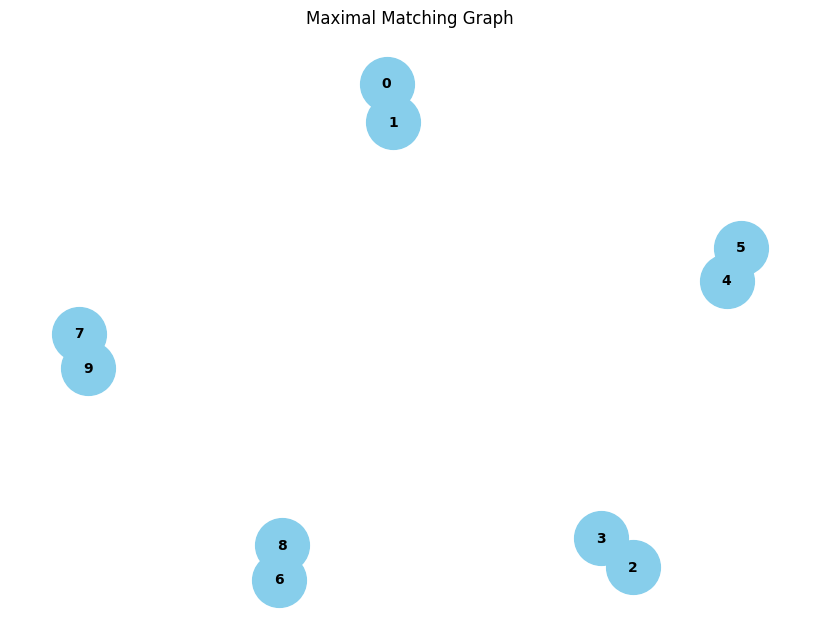

In [47]:
# Find maximal matching
maximal_matching = find_maximal_matching(adj_matrix)
print("Maximal Matching:", maximal_matching)

# Create a graph using NetworkX
G = nx.Graph()
for edge in maximal_matching:
    G.add_edge(edge[0], edge[1])

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
plt.title("Maximal Matching Graph")
plt.show()